# Introduction to Machine Learning: Neural Networks

In this notebook, we will explain the structure of neural networks and build an example to show how they can be used to develop machine learning models. They has been around since the 1950s and have gone through several iterations. The current state-of-the-art neural network structure is often referred to as deep-learning.

Neural networks are maching learning model inspired by how our brains work and are particularly good at recognizing patterns and classification. A neuron is a cell in the nervous system that receives and transmits information. Perceptrons are artificial versions of a single neuron in neural networks. For a mathematical model, we abstract the actual working of neurons into three numbers:

- activation - a value representing the excitement of a neuron
- default bias - a value representing a default or bias (sometimes called a threshold)
- weight - a value representing a connection to another neuron

In addition, there is a transfer function that takes all the incoming activations time their associated weights plus the bias and squashed the resulting sum within a range.

The following basic NN performs a simple weighted summation of the inputs. The values $x_1$, $x_2$, and $x_3$ are the inputs to our NN and the constant value 1 is our bias.

![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*UWJ52M5qNZp-38j11STT5g.png)

Neurons are grouped together in layers to build a network. A typical Artifical Neural Network (ANN) is composed of three layers: input, hidden, and output. Each layer contains a set of neurons, or nodes. Typically, the nodes in a layer are fully connected to the nodes in the next layer.

Information is propagated forward from the input layer through the hidden layer and finally through the output layer to produce a response.

![image](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/neutral-network-diagram.svg)



In the simple perceptron shown above, the output node on the right takes the weighted sum and applies an activation function f and outputs a value. A single perceptron can perfrom basic linear classification problems such as computing the logical AND, OR, and NOT functions. A single perceptron can be trained to compute any function which is linearly separable, but cannot solve any function that is not linearly separable. To learn how to code a simple perceptron and train it with Python, checkout [this tutorial](https://carpentries-incubator.github.io/machine-learning-novice-sklearn/06-neural-networks/index.html).

## Activation functions

The most simple activation function is the `step function` used by the Perceptron algorithm.

The step function is not differentiable, which can lead to problems when applying gradient descent and training the network. Instead, a more common activation function is the sigmoid function.

![image](https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/04/activation_functions-768x585.png?lossy=1&strip=1&webp=1)

While sigmoid is continuous and differentiable everywhere ad is symmetric around the y-axis, the outputs of the sigmoid are not zero-centered and saturated neurons kill the gradient.

The hyperbolic tangent is zero-centered with higher gradients. Rectified Linear Unit (ReLU) or ramp functions is not saturable and is extremely computationally efficient. Empirically, the ReLU activation function tends to outperform both the sigmoid and tanh in nearly all applications. A variant of ReLU called Leaky ReLUs allow for a small non-zero gradient when the unit is not active to make ReLU differentiable everywhere.

## Network architecture

A single perceptron cannot be used to solve a non-linearly separable function. For that, we need to use multiple perceptrons and typically multiple layers of perceptrons. The most common architecture is the feedforward network, where a connection between nodes is only allowed from nodes in layer i to nodes in layer i+1. There are no backward or inter-layer connection allowed.  To learn more about building developing a simple neural network, read [this tutorial](https://towardsdatascience.com/building-a-simple-neural-network-from-scratch-a5c6b2eb0c34).

Multi-layer perceptrons need to be trained by showing them a set of training data and measuring the error between the network’s predicted output and the true value. There are a number of training algorithms available for neural networks, but we are going to use one of the best established and well known, the backpropagation algorithm (backward propagation of errors) for feedforward neural networks.

The goal of training a neural network is to adjust the weights of the connections between neurons so that the network can make accurate predictions on new, unseen data. Backpropagation networks fall under the category of supervised learning and is called backpropagation because it takes the error calculated between an output of the network and the true value and takes it back through the network to update the weights. The algorithm computes the gradients of the loss with respect to the network's weights, layer by layer, starting from the output layer and moving backward to the input layer.

![image](https://miro.medium.com/v2/resize:fit:720/1*KNZZYteeBqkJViS1_LT1CQ.gif)

Unlike feedforward neural networks, where data flows strictly in one direction (from input to output), Recurrent Neural Networks have connections that allow information to be passed backward, forming a loop within the network. RNNs are designed to handle sequential data as the network maintains a form of memory. As RNNs can process sequences of varying length, they are well-suited for time series analysis, natural language processing, and video and audio analysis. More advanced architectures such Long Short-term memory (LSTM) networks, have been developed to address RNN limitations in capturing long-term dependencies.



## Deep Learning

The term "deep" in deep learning refers to the multiple layers in these neural networks. Deep learning algorithms aim to automatically learn hierarchical representations of data by progressively extracting more abstract features from the raw input. They are often used with GPU (Graphical Processing Unit) which are good at executing multiple operations simultaneously.

Scikit learn is not really setup for Deep Learning. Thus, we have to rely on other libraries. Common choices include:

- [TensorFlow](https://www.tensorflow.org/): Developed by Google, TensorFlow is one of the most widely used libraries for building and training neural networks. It offers excellent support for deep learning, including convolutional neural networks and recurrent neural networks, and provides a high level of flexibility and control over the model architecture. TensorFlow is known for its high performance and scalability, making it a good choice for large-scale production applications.

- [PyTorch](https://pytorch.org/): Developed by Facebook, PyTorch is another popular library for neural networks. It is known for its ease of use and flexibility, and is especially popular among researchers and academics. PyTorch offers dynamic computational graphs, which allow for more flexible and efficient model building, and provides excellent support for deep learning, including convolutional neural networks and recurrent neural networks.

- [Keras](https://keras.io/): Keras is a high-level neural network library that runs on top of TensorFlow, Theano, or Microsoft Cognitive Toolkit. It is known for its ease of use and simplicity, making it a good choice for beginners or those who want to quickly prototype and experiment with different models. Keras offers a range of pre-built models and layers.

### Convolutional Neural Networks

Convolutional neural networks are simply a special case of feedforward neural networks designed for processing grid-like data, such as images. CNNs are particularly powerful in computer vision tasks because they can automatically learn hierarchical features and patterns from raw pixel data, making them well-suited for image recognition, object detection, image generation, and other visual tasks. CNNs use convolutional layers, which involve sliding small filters (also called kernels) over the input data for localized feature extraction.

![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*7_BCJFzekmPXmJQVRdDgwg.png)

The concept for this exercise has been adapted from a similar exercise presented at the [IVADO/MILA Deep Learning School](https://mila.quebec/en/the-6th-ivado-mila-deep-learning-school-a-chance-to-stay-at-the-forefront-of-technological-development/).

In [ ]:
import torch
import matplotlib

use_gpu = torch.cuda.is_available()
device = torch.device("cuda:0" if use_gpu else "cpu")

print("Torch version: ", torch.__version__)
print("GPU Available: {}".format(use_gpu))

Torch version:  2.0.1+cu118
GPU Available: True


*PyTorch* is a Python library that supports a vibrant ecosystem of tools and libraries for ML in vision, NLP, and more. It provides two high-level features:
<ul>
<li> operations on <a href="https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py">tensors</a> (such as NumPy) with GPU support,</li>
<li> operations for creating and optimizing computational graphs with an automatic differentiation system called <a href="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py">Autograd</a>.</li>
</ul>

<a href="https://pytorch.org/docs/stable/torch.html">PyTorch docs</a> contain the API documentation and <a href="https://pytorch.org/tutorials/">many tutorials</a>.
Also, PyTorch offers several data processing utilities. One of these utilities is the class <a href="http://pytorch.org/docs/master/data.html#"> `torch.utils.data.Dataset`</a> which offers an easy to use interface to handle a data set. For more information, please refer to the following urls:
<ul>
<li>PyTorch data sets: <a href="http://pytorch.org/docs/master/data.html"> PyTorch - datasets</a>.</li>
<li>A tutorial for loading data: <a href="http://pytorch.org/tutorials/beginner/data_loading_tutorial.html"> PyTorch - data loading tutorial</a>.</li>
</ul>

<a href="http://pytorch.org/docs/master/cuda.html#module-torch.cuda">`torch.cuda`</a> is a package that provides the same functions as CPU tensors but for  CUDA tensors, which are used for GPU computing. <a href="http://pytorch.org/docs/master/cuda.html#torch.cuda.is_available">`torch.cuda.is_available()`</a> returns a boolean indicating if CUDA is currently available. Finally, we recommend using a `device` variable that identifies the device on which you want to perform computations. We can assign a tensor to a device with the method `.to(device)`. By default, the tensors are CPU tensors.

## How to define a model in PyTorch

The <a href="https://pytorch.org/docs/stable/nn.html">PyTorch NN package</a> contains many useful classes for creating computation graphs.
<ul>
<li> The class <a href="http://pytorch.org/docs/master/nn.html#module">torch.nn.Module</a>:
any new module must inherit from this class or its descendants (subclasses).
</li>   
<li> The `forward` method:  any class defining a module must implement the `forward(...)` method, which defines the transformation of inputs to outputs.</li>  
<li> The class <a href="http://pytorch.org/docs/master/nn.html#torch.nn.Linear">`torch.nn.Linear(in_features, out_features)`</a>: this class implements a linear transformation. By default, it takes two parameters:
    <ul>
    <li>`in_features`: the size of the data at the input of the module. </li>
    <li>`out_features`: the size of the data at the output of the module. </li>
    </ul>
</li>
<li> The module <a href="http://pytorch.org/docs/master/nn.html#torch-nn-functional">`torch.nn.functional`</a>:
it defines a set of functions that can be applied directly to any tensor. As examples, we have:
    <ul>
    <li> non-linear functions: sigmoid(...), tanh(...), relu(...), etc...</li>
    <li> cost functions: mse_loss(...), nll(...., cross_entropy(...), etc ... </li>
    <li> regularization functions: droupout(...), etc ... </li>
    <li> ...</li>
    </ul>
</li>
</ul>

# The MNIST dataset
MNIST is the classic go-to **classification dataset** used in **computer vision**. It is available here: <a href="http://yann.lecun.com/exdb/mnist/">Yann LeCun's website</a>.

Each datum is an **image of a handwritten digit**. Here are a few examples from this dataset:

![Alt Text](https://github.com/mila-iqia/ecole_dl_mila_ivado/blob/master/tutoriaux/CNN/images/mnist.png?raw=true)

Each image also comes with a **class label** which indicates which digit does the image correspond to. For example, the labels of the examples above are 5, 0, 4, and 1 respectively. The classes are balanced which means that all digits appear (roughly) the same number of times in the dataset.

The dataset is composed of **60 000 training examples** and **10 000 test examples**. All images have exactly the same size (**28x28 pixels** or 28 rows by 28 columns). Each pixel is represented by a number between 0 and 255 which represents its grey level (0 is white and 255 is black). Depending on the model, each image may have to be flattened (to a 784-length vector).

## Objective

Our goal is to find a model that correctly classifies these images. In particular, our model will take as input (features/covariates/independant-variables) an image and will predict its digit (label/dependant variable). This problem can be formalized as follows:

`f(image) = predicted digit`

where `f` is a function.

In this tutorial, we will consider both **multi-layer perceptrons (MLPs)** and **convolutional neural networks** as functions for solving this prediction problem. Both models take as inputs pixel intensities which will be modified using mathematical operations through the layers of the networks. Their output is a vector of size *1x10* where each entry corresponds to the (normalized) score that the input image is a particular digit. The sum over these 10 values is 1, and each score is non-negative. This is why these scores can be interpreted as probabilities. Our final prediction will be the entry with the highest score. For example, this prediction

`[0.8, 0.1, 0, 0, 0, 0.05, 0.05, 0.0, 0.0, 0.0, 0.0]`

indicates that the model assigns a score of 0.8 to class 0.

Learning implies finding the parameters of a model that will maximize the model's performance. To learn, we will start by randomly initializing the parameters of our model. Then we iterate through examples. For each example we will obtain the network's prediction, compare it with the true label, and then update the parameters of the models to obtain a better prediction. We do this until we reach some predetermined stopping criteria.

## Download the dataset and create the data loader

Before we begin training, we have to obtain the MNIST dataset. It turns out that there are built-in functions within PyTorch to do so.

### Tool box
**Note:** PyTorch comes with function to load, shuffle, and augment data.

Here is an easy way to load the data in PyTorch:
<ol>
<li>Subclass <a href="http://pytorch.org/docs/master/data.html#torch.utils.data.Dataset">`torch.utils.data.Dataset`</a> and add  `__getitem__` and `__len__` methods.</li>
<li>Then you can use<a href="http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader">`torch.utils.data.DataLoader`</a> to read and load the data into memory.</li>
</ol>

It is even easier for MNIST in PyTorch since there is already a subclass of "datasets" defined for it: <a href="http://pytorch.org/docs/master/torchvision/datasets.html#mnist">`torchvision.datasets.MNIST`</a>.

<a href="http://pytorch.org/docs/master/torchvision/datasets.html">Other datasets are also similarly available</a>

**Note:** <a href="http://pytorch.org/docs/master/tensors.html#torch.Tensor.view">`torch.Tensor.view()`</a> returns a new tensor with the same data as the original tensor but a different shape. For example, it can be used to flatten an image.

In [ ]:
import numpy as np
import random
import torch
from torch.utils.data import sampler, DataLoader
from torchvision.datasets import MNIST
import torchvision.transforms as transforms


manualSeed = 1234
use_gpu = torch.cuda.is_available()

# Fixing random seed
random.seed(manualSeed)
np.random.seed(manualSeed)
torch.manual_seed(manualSeed)
if use_gpu:
   torch.cuda.manual_seed_all(manualSeed)

class ChunkSampler(sampler.Sampler):
    """Samples elements sequentially from some offset.
    From: https://github.com/pytorch/vision/issues/168

    Parameters
    ----------
    num_samples: int
      # of desired datapoints
    start: int
      Offset where we should start selecting from
    """
    def __init__(self, num_samples, start=0):
        self.num_samples = num_samples
        self.start = start

    def __iter__(self):
        return iter(range(self.start, self.start + self.num_samples))

    def __len__(self):
        return self.num_samples


train_dataset = MNIST(root='../data',
                      train=True,
                      transform=transforms.ToTensor(),
                      download=True)

test_dataset = MNIST(root='../data',
                     train=False,
                     transform=transforms.ToTensor())

train_dataset_sizes = len(train_dataset)
num_train_samples = int(0.8 * train_dataset_sizes)
num_valid_samples = train_dataset_sizes - num_train_samples
num_test_samples = len(test_dataset)

print('# of train examples: {}'.format(num_train_samples))
print('# of valid examples: {}'.format(num_valid_samples))
print('# of test examples: {}'.format(num_test_samples))

batch_size = 100

train_loader = DataLoader(dataset=train_dataset,
                          sampler=ChunkSampler(num_train_samples, 0),
                          batch_size=batch_size,
                          shuffle=False)

valid_loader = DataLoader(dataset=train_dataset,
                          sampler=ChunkSampler(
                              num_valid_samples, num_train_samples),
                          batch_size=batch_size,
                          shuffle=False)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 179974421.97it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 24496601.38it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 65629366.63it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16479696.17it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

# of train examples: 48000
# of valid examples: 12000
# of test examples: 10000


Inputs size: torch.Size([100, 1, 28, 28])
Classes size: torch.Size([100])


Display the first image:


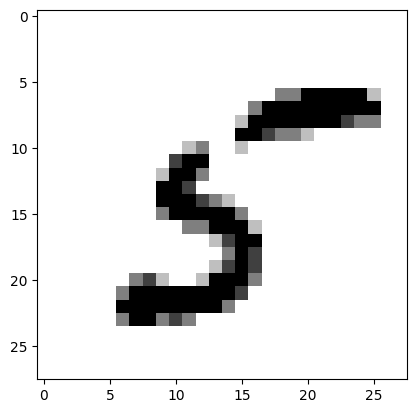

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

inputs, classes = next(iter(train_loader))

print('Inputs size: {}'.format(inputs.size()))
print('Classes size: {}'.format(classes.size()))

# Random image of the batch
img1 = 255 - inputs[np.random.randint(len(inputs))] * 255

# Plot the image
print('\n\nDisplay the first image:')
img1 = img1.numpy()[0, :, :]
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.grid(False)
plt.show()

# CPU or GPU
**Note:** <a href="http://pytorch.org/docs/master/cuda.html#module-torch.cuda">`torch.cuda`</a> is a library which can perform tensor operations using GPUs. Specifically, the library includes CUDA tensors which offer the same operations as regular tensors but instead run on GPUs, instead of CPUs.
<a href="http://pytorch.org/docs/master/cuda.html#torch.cuda.is_available">`torch.cuda.is_available()`</a> returns whether or not CUDA is available. Adding `.to("cuda:0")` to the variable identifying a CPU tensor, returns the equivalent GPU tensor.

For more information about using GPUs on colab, please refer to this [tutorial](https://colab.research.google.com/drive/1y3ZE4m-D7lPoMzsypSEXessYmjWfKGqD#scrollTo=3IEVK-KFxi5Z).


In [ ]:
use_gpu = torch.cuda.is_available()

print("GPU Available: {}".format(use_gpu))

GPU Available: True


We are going to compare the performance of a CNN to the performance of a vanilla MLP. Below is a quick reminder of MLPs, the architecture of the MLP we will be using, as well as the code to train the MLP.

# Multi-layer perceptron (MLP)
A multi-layer perceptron is a vanilla few-forward neural network. Our instanciation will take as input an image, will transform it through a series of hidden layers and then will pass it to an output layer. This output is a vector of 10 numbers where each represents the normalized score of a particular class (this is sometimes interpreted as a probability).

For example, here an MLP architecture to classify MNIST images:
![Alt Text](https://github.com/mila-iqia/ecole_dl_mila_ivado/blob/master/tutoriaux/CNN/images/mlp.png?raw=true)

Whenever you are trying to solve a prediction task, the process usually goes as follows:
<ol>
<li>Determine the network's artchitecture. This will implicitely determine the number of parameters (weights and biases) of the network.</li>
<li>Determine the cost function and the optimization method.</li>
<li>Train the weights of the network (i.e., fit the model to train data).</li>
<li>Test the network (i.e., evaluate its performance on test data).</li>
</ol>

This procedure is general and applies to all types of (deep) neural networks.

### Toolbox

A (deep) neural network can be coded by using the library <a href="http://pytorch.org/docs/master/nn.html">`torch.nn`</a>. `nn` uses <a href="http://pytorch.org/docs/master/autograd.html">`torch.autograd`</a> to instantiate and computer the gradients (of the loss function with respect to the parameters).

In [ ]:
import torch.nn as nn
import copy

input_size = 784
hidden_size = 500
num_classes = 10

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()

        self.hidden_layer = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU())

        self.output_layer = nn.Sequential(
            nn.Linear(hidden_size, num_classes))

    def forward(self, x):

        out = self.hidden_layer(x)

        out = self.output_layer(out)

        return out

model = MLP(input_size, hidden_size, num_classes)
# switch model to GPU
model = model.to(device)

print(model)

print("\n\n# Parameters: ", sum([param.nelement() for param in model.parameters()]))

# Save the initial weights of model
init_model_wts = copy.deepcopy(model.state_dict())

learning_rate = 1e-2

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

MLP(
  (hidden_layer): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): ReLU()
  )
  (output_layer): Sequential(
    (0): Linear(in_features=500, out_features=10, bias=True)
  )
)


# Parameters:  648010


In [ ]:
import time
from torch.autograd import Variable

model.load_state_dict(init_model_wts)

since = time.time()

num_epochs = 10
train_loss_history = []
valid_loss_history = []

print("# Start training #")
for epoch in range(num_epochs):

    train_loss = 0
    train_n_iter = 0

    # Set model to train mode
    model.train()

    # Iterate over train data
    for images, labels in train_loader:

        # put images on proper device (GPU)
        images = images.to(device)
        labels = labels.to(device)

        # Flatten the images
        images = images.view(-1, 28*28)

        # Zero the gradient buffer
        optimizer.zero_grad()

        # Forward
        outputs = model(images)

        loss = criterion(outputs, labels)

        # Backward
        loss.backward()

        # Optimize
        optimizer.step()

        # Statistics
        train_loss += loss.item()
        train_n_iter += 1

    valid_loss = 0
    valid_n_iter = 0

    # Set model to evaluate mode
    model.eval()

    # Iterate over valid data
    for images, labels in valid_loader:

        # put images on proper device (GPU)
        images = images.to(device)
        labels = labels.to(device)

        # Flatten the images
        images = images.view(-1, 28*28)


        # Forward
        outputs = model(images)

        loss = criterion(outputs, labels)

        # Statistics
        valid_loss += loss.item()
        valid_n_iter += 1

    train_loss_history.append(train_loss / train_n_iter)
    valid_loss_history.append(valid_loss / valid_n_iter)

    print('\nEpoch: {}/{}'.format(epoch + 1, num_epochs))
    print('\tTrain Loss: {:.4f}'.format(train_loss / train_n_iter))
    print('\tValid Loss: {:.4f}'.format(valid_loss / valid_n_iter))

time_elapsed = time.time() - since

print('\n\nTraining complete in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

# Start training #

Epoch: 1/10
	Train Loss: 2.0848
	Valid Loss: 1.5925

Epoch: 2/10
	Train Loss: 1.0058
	Valid Loss: 0.6334

Epoch: 3/10
	Train Loss: 0.5535
	Valid Loss: 0.4530

Epoch: 4/10
	Train Loss: 0.4410
	Valid Loss: 0.3867

Epoch: 5/10
	Train Loss: 0.3902
	Valid Loss: 0.3516

Epoch: 6/10
	Train Loss: 0.3600
	Valid Loss: 0.3287

Epoch: 7/10
	Train Loss: 0.3387
	Valid Loss: 0.3114

Epoch: 8/10
	Train Loss: 0.3218
	Valid Loss: 0.2974

Epoch: 9/10
	Train Loss: 0.3075
	Valid Loss: 0.2853

Epoch: 10/10
	Train Loss: 0.2949
	Valid Loss: 0.2746


Training complete in 1m 21s


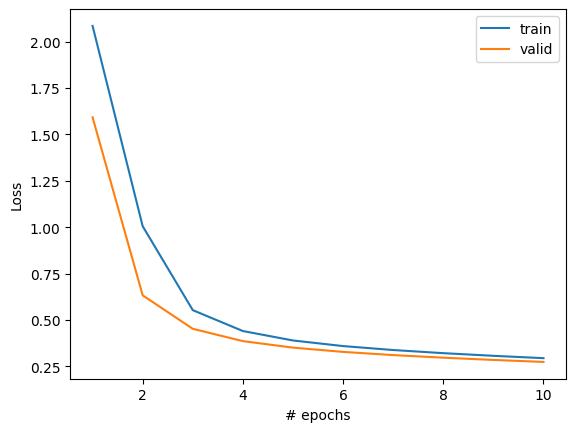

In [ ]:
# Save history for later
mlp_train_loss_history = train_loss_history
mlp_valid_loss_history = valid_loss_history

# Plot training and validation curve
x = range(1, num_epochs + 1)
plt.plot(x, mlp_train_loss_history, label='train')
plt.plot(x, mlp_valid_loss_history, label='valid')

plt.xlabel('# epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Set model to evaluate mode
model.eval()

correct = 0
total = 0

# Iterate over test data
for images, labels in test_loader:

    # put images on proper device (GPU)
    images = images.to(device)
    labels = labels.to(device)

    # Flatten the images
    images = images.view(-1, 28*28)


    # Forward
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    # Statistics
    total += labels.size(0)
    correct += torch.sum(predicted == labels.data)

print('Accuracy on the test set: {:.2f}%'.format(100 * correct / total))

Accuracy on the test set: 92.17%


## Convolutional Neural Networks

We first review the basic concepts that underlie CNNs.

### Convolution

A convolution "slides" a filter *K* along image *I* to obtain an output *I*\**K*.

Here is an example of a 2D convolution:

![Alt Text](https://github.com/mila-iqia/ecole_dl_mila_ivado/blob/master/tutoriaux/CNN/images/numerical_no_padding_no_strides.gif?raw=true)


### Filters

Filters (or kernels) are used to extract information useful to the task from their input. Filters are generally of size *n* \* *n* where *n* is usually odd. The filters are parametrized by weights, one for each of its entry, which are learned by the convolutional network.

The filter used in the previous example is:

![Alt Text](https://github.com/mila-iqia/ecole_dl_mila_ivado/blob/master/tutoriaux/CNN/images/d7acc4aeb74d9e9cb5fb51482a302196594837fe.png?raw=true)

### Depth

We typically use *M* of filters which can be understood as the depth of the layer (see below). Note that this is different from the depth of the network (which is the number of layers). M is a hyperparameter. Here, each filter's output (blue circles) is represented as a single depth dimension on the output.

![Alt Text](https://github.com/mila-iqia/ecole_dl_mila_ivado/blob/master/tutoriaux/CNN/images/Conv_layer.png?raw=true)

### Stride

The stride corresponds to the number of pixels the filter moves over in between each step of the convolution. The stride is measured in terms of a number of pixels. We typically use strides of 1 or 2. The larger the stride, the smaller the dimension of the output.

### Zero padding

Zero padding consists in padding (adding) a border of zeros around the input image. This can be useful to preserve the dimension from input to output.

Below is an example of a zero padding which preserves the dimensions from input to output. Here, zero padding is set to 1, stride is set to 1, and the filter has size 3x3.

![Alt Text](https://github.com/mila-iqia/ecole_dl_mila_ivado/blob/master/tutoriaux/CNN/images/same_padding_no_strides.gif?raw=true)


### Max Pooling

In addition to convolutions, CNNs usually have pooling layers. The goal of pooling is to reduce the dimensionality of the input in-between two convolution layers to reduce the number of parameters in the network. For example, the famous LeNet CNN, uses max pooling with 2x2 filters and a stride of 2. Max pooling outputs the max value in a 2x2 region. This output is then the input of the next layer.

Here is an example of the max pooling operation:

![Alt Text](https://github.com/mila-iqia/ecole_dl_mila_ivado/blob/master/tutoriaux/CNN/images/maxpool.jpeg?raw=true)


### Receptive Field

The receptive field is a measure of the CNNs' capacity to perceive information at different input scales. In an MLP (fully connected), the features are connected to every neuron. The receptive field of this MLP is the full image.

For CNNs, convolution operations typically imply sparse connections. In other words, each filter only has a local receptive field. However, each successive layer will have access to a slightly larger receptive field.

Let's look at an example. Imagine a 3x3 filter with stride set to 1. In this case, the first layer's receptive field is a maximum of 3x3. However, the more layer we add the more we increase the network's receptive field. Adding a second layer with 3xe3 filters and a stride of 1, our receptive field is increased to 5x5. Adding a third 3x3 layer further increases our receptive field to 7x7.

What is the advantage of using multiple smaller successive filters instead of a single larger one? A single large filter of 7x7 implies 49 parameters. Instead 3 layers of 3x3 filters requires only 27 parameters (9 \* 3). It is therefore more efficient to use multiple successive filters and in both cases the receptive field is the same (7x7). In addition, by using multiple successive filters, we can introduce more non-linearities in the model (one after each filter).

Here the 3x3 filter (in grey) with a stride of 1 has a receptive field of 5x5 (yellow region):

![Alt Text](https://github.com/mila-iqia/ecole_dl_mila_ivado/blob/master/tutoriaux/CNN/images/sNBmKMKAz-yJeCuS14usSqw.png?raw=true)



## LeNet
CNNs have been developed to model images. They can model images more efficiently (with fewer parameters) than an equivalent MLP. LeNet is a basic CNN for classification. It comes in several versions.

We will use a "LeNet 5" to classify MNIST digit images:

![Alt Text](https://github.com/mila-iqia/ecole_dl_mila_ivado/blob/master/tutoriaux/CNN/images/lenet5.png?raw=true)


To solve a prediction task, the process usually goes as follows (it is the same for MLPs and CNNs):
<ol>
<li>Determine the network's architecture. This will implicitly determine the number of parameters (weights and biases) of the network.</li>
<li>Determine the cost function and the optimization method.</li>
<li>Train the weights of the network (i.e., fit the model to train data).</li>
<li>Test the network (i.e., evaluate its performance on test data).</li>
</ol>


## Determining the network's architecture
### Toolbox
**Recall:** To instantiate a particular network in PyTorch, one first subclasses <a href="http://pytorch.org/docs/master/nn.html#torch.nn.Module">`torch.nn.Module`</a> and then writes the following methods :
<ul>
<li>The `__init__` method defines the layers. </li>
<li>The `forward(input)` method returns the `output`.</li>
</ul>


For LeNet 5's '`__init__`, the following classes can be used:
<ul>
<li><a href="http://pytorch.org/docs/master/nn.html#torch.nn.Conv2d">`torch.nn.Conv2d(in_channels, out_channels, kernel_size)`</a> applies a 2D convolution on the input channels.</li>
<li><a href="http://pytorch.org/docs/master/nn.html#torch.nn.MaxPool2d">`torch.nn.MaxPool2d(kernel_size)`</a> applies 2D max pooling on the input channels.</li>
<li><a href="http://pytorch.org/docs/master/nn.html#torch.nn.Linear">`torch.nn.Linear(in_features, out_features)`</a> applies a linear transformation on its input: y = Ax + b.</li>
<li><a href="http://pytorch.org/docs/master/nn.html#torch.nn.ReLU">`torch.nn.Relu()`</a> applies an elementwise Relu activation: Relu(x) = max(0, x).</li>
<li><a href="http://pytorch.org/docs/master/nn.html#torch.nn.Softmax">`torch.nn.Softmax(dim)`</a> applies a softmax activation to an n-dimensional tensor (normalizes the exponentiated entries).</li>
<li><a href="http://pytorch.org/docs/master/nn.html#torch.nn.Sequential">`torch.nn.sequential`</a> a sequential container in which to add modules in the order in which they will be constructed.</li>
</ul>

`forward(input)` successively applies the input data to the different layers defined in  `__init__`.

Finally, `model.to("cuda:0")` passes the model to an available GPU.

### Implementation

In [ ]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2))

        self.block2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2))

        self.fc = nn.Linear(7*7*32, 10)


    def forward(self, x):
        out = self.block1(x)

        out = self.block2(out)

        # Flatten the output of block2
        out = out.view(out.size(0), -1)

        out = self.fc(out)

        return out

model = LeNet5()
model = model.to(device)

print(model)
print("\n\n# Parameters: ", sum([param.nelement() for param in model.parameters()]))

LeNet5(
  (block1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)


# Parameters:  28938


We note that LeNet4 has 28 938 parameters versus 648 010 parameters for an somewhat equivalent MLP with two hidden layers. This reduction in the number of parameters is significant.

Here is how we calculate the number of parameters for LeNet5:

```
1st layer: 16 filters of size 5x5 + 16 biases = 16*5*5 + 16 = 416
2nd layer: 16 * 32 filters of size 5x5 + 32 biases = 16*32*5*5 + 32 = 12 832
FC layer: 7*7*32*10 + 10 biases = 15 690

Total = 416 + 12 832 + 15 690 = 28 938
```

As a comparison, here is how we calculate the number of parameters of the two hidden layer MLP:
The input flattens the 28x28 images into a vector of size 784. The second layer has 500 neurons. Each neuron requires 784 weights + 1 bias. So 500\*785 parameters. This is then fed to another layer of 500 neurons which adds 501\*500 parameters. Finally, the output layer has 10 neurons, each with 500 weights and a single bias for a total of 10\*501 parameters.

So in total we have:
```
500*785 + 501*500 + 10*501 = 648010
``` parameters.

In [ ]:
# Save the initial weights of model
init_model_wts = copy.deepcopy(model.state_dict())

## Determine the cost function and the optimization method
### Toolbox
**Recall:** A common choice for a multi-class task are the following:
<ul>
<li>**Cost function :** <a href="http://pytorch.org/docs/master/nn.html#torch.nn.CrossEntropyLoss">`torch.nn.CrossEntropyLoss()`</a>. The cross entropy is often used in this context. It compares a (multivariate) distribution $p$ with a reference distribution $t$. It is minimized for $p=t$ and it is expressed mathematically by: $-\sum_j t_{ij} \log(p_{ij})$ where $p$ is the prediction, $t$ the target, $i$ are examples and $j$ the target class.</li>
<li>**Optimization method :** <a href="http://pytorch.org/docs/master/optim.html#torch.optim.SGD">`torch.optim.SGD(net.parameters(), lr=learning_rate)`</a> a standard stochastic gradient descent (SGD) implementation</li>
</ul>

### Implementation


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Train the weights of a network
### Toolbox
**Recall:** Training a network usually involves iterating for multiple epochs over the training dataset. One epoch corresponds to one pass over the full dataset.

The dataset is usually divided into batches. Each epoch will then receive sequentially batches. For each batch we do the following operations:
<ol>
<li>`optimizer.zero_grad()`: we clear the previously stored gradients.</li>
<li>`loss.backward()`: we evaluate the cost, the gradients, and backpropagate the gradients through the computation graph.</li>
<li>`optimizer.step()`: we update the parameters using the previously calculated gradients. For SGD, the update is: `weight = weight - learning_rate * gradient`.</li>
</ol>

### Implementation



In [ ]:
model.load_state_dict(init_model_wts)

since = time.time()

num_epochs = 10
train_loss_history = []
valid_loss_history = []

print("# Start training #")
for epoch in range(num_epochs):

    train_loss = 0
    train_n_iter = 0

    # Set model to train mode
    model.train()

    # Iterate over train data
    for images, labels in train_loader:

        # put images on proper device (GPU)
        images = images.to(device)
        labels = labels.to(device)

        # Zero the gradient buffer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        loss = criterion(outputs, labels)

        # Backward
        loss.backward()

        # Optimize
        optimizer.step()

        # Statistics
        train_loss += loss.item()
        train_n_iter += 1

    valid_loss = 0
    valid_n_iter = 0

    # Set model to evaluate mode
    model.eval()

    # Iterate over valid data
    for images, labels in valid_loader:

        # put images on proper device (GPU)
        images = images.to(device)
        labels = labels.to(device)

        # Forward
        outputs = model(images)

        loss = criterion(outputs, labels)

        # Statistics
        valid_loss += loss.item()
        valid_n_iter += 1

    train_loss_history.append(train_loss / train_n_iter)
    valid_loss_history.append(valid_loss / valid_n_iter)

    print('\nEpoch: {}/{}'.format(epoch + 1, num_epochs))
    print('\tTrain Loss: {:.4f}'.format(train_loss / train_n_iter))
    print('\tValid Loss: {:.4f}'.format(valid_loss / valid_n_iter))

time_elapsed = time.time() - since

print('\n\nTraining complete in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

# Start training #

Epoch: 1/10
	Train Loss: 1.1627
	Valid Loss: 0.3954

Epoch: 2/10
	Train Loss: 0.3145
	Valid Loss: 0.2489

Epoch: 3/10
	Train Loss: 0.2233
	Valid Loss: 0.1857

Epoch: 4/10
	Train Loss: 0.1773
	Valid Loss: 0.1541

Epoch: 5/10
	Train Loss: 0.1498
	Valid Loss: 0.1342

Epoch: 6/10
	Train Loss: 0.1311
	Valid Loss: 0.1203

Epoch: 7/10
	Train Loss: 0.1175
	Valid Loss: 0.1099

Epoch: 8/10
	Train Loss: 0.1070
	Valid Loss: 0.1020

Epoch: 9/10
	Train Loss: 0.0987
	Valid Loss: 0.0958

Epoch: 10/10
	Train Loss: 0.0919
	Valid Loss: 0.0909


Training complete in 1m 35s


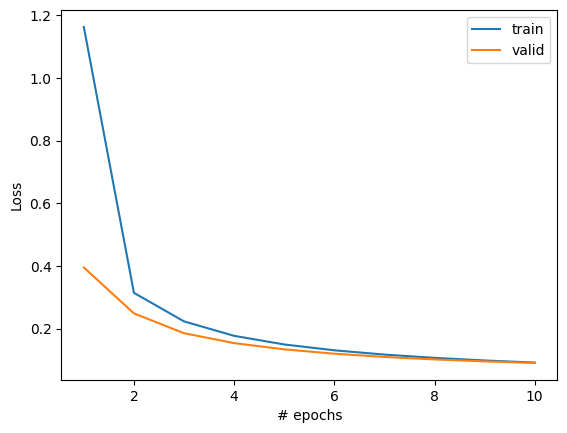

In [ ]:
# Save history for later
lenet5_train_loss_history = train_loss_history
lenet5_valid_loss_history = valid_loss_history

# Plot training and validation curve
x = range(1, num_epochs + 1)
plt.plot(x, lenet5_train_loss_history, label='train')
plt.plot(x, lenet5_valid_loss_history, label='valid')

plt.xlabel('# epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

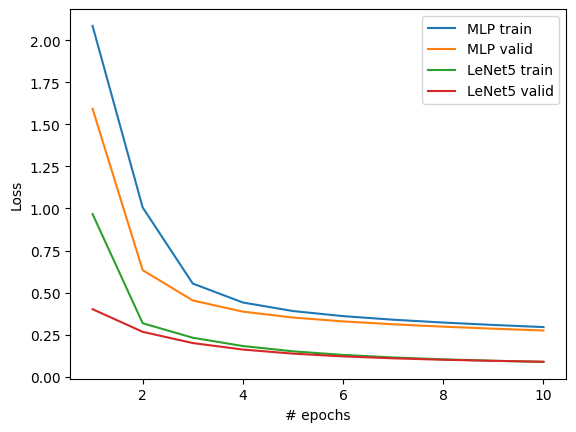

In [ ]:
# Plot training and validation curve
x = range(1, num_epochs + 1)
plt.plot(x, mlp_train_loss_history, label='MLP train')
plt.plot(x, mlp_valid_loss_history, label='MLP valid')
plt.plot(x, lenet5_train_loss_history, label='LeNet5 train')
plt.plot(x, lenet5_valid_loss_history, label='LeNet5 valid')

plt.xlabel('# epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Set model to evaluate mode
model.eval()

correct = 0
total = 0

# Iterate over data.
for images, labels in test_loader:

    # put images on proper device (GPU)
    images = images.to(device)
    labels = labels.to(device)

    # No need to flatten the images here !


    # Forward
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    # Statistics
    total += labels.size(0)
    correct += torch.sum(predicted == labels.data)

print('Accuracy on the test set: {:.2f}%'.format(100 * correct / total))

Accuracy on the test set: 97.68%


# Reproducibility

We have seen that there is place for a lot of randomness in machine learning experiments, specifically when:
- splitting an original dataset into training/validation/test sets.
- initializing the parameters of a model.
- splitting a training set into batches to train a model.

Therefore, we normally get different results each time we run the same experiment. To allow reproducibility of your results, it is required to fix the **random seed** before creating each dataset and model. Hence, to be reproducible it is best practice to manually set:

1. Python pseudorandom number generator at a fixed value:
```
import random
random.seed(seed_value)
```

2. NumPy pseudorandom number generator at a fixed value:
```
import numpy as np
np.random.seed(seed_value)
```

3. PyTorch pseudorandom number generator at a fixed value for all devices (both CPU and GPU):
```
import torch
torch.manual_seed(seed_value)
```

4. PyTorch pseudorandom number generator at a fixed value for the GPU(s):
```
import torch
torch.cuda.manual_seed(seed_value)  # Current GPU.
torch.cuda.manual_seed_all(seed_value)  # All GPUs.
```

5. CuDNN algorithms (an extension of CUDA for deep learning) to be deterministic in PyTorch:
```
import torch
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
```

Note that deterministic algorithms can make computations dramatically slower. While manually fixing random seeds helps reproducibility, completely reproducible results are not guaranteed across PyTorch releases and different platforms, devices or drivers.

Furthermore, more randomness comes in when doing hyperparameter tuning or using multiple GPU devices in parallel, but that's beyond the scope of this tutorial.

Finally, a good practice, implemented in Scikit-Learn, is to create a local RandomState object instead of using the global RandomState object and to pass it to every module using randomness. However, the Pytorch API does not allow it, and for now, using global RNGs is recommended.